In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Patch
import plotly.express as px

In [7]:
data_233 = pd.read_csv('./Data/NA233.csv')
data_233.set_index('PSNO_NA_ECP', inplace=True)
data_233 = data_233.sort_index()
yellow = '#FFC300'
blue = '#00b0be' 
pink = '#f45f74' 
orange = '#FF5F1F'
light_blue = '#8fd7d7'
light_pink = '#ff8ca1'

## **Graph 1**
Number of Polling Stations won by each candidate in General Elections 2024 in NA-233 (Based on ECP Form-45s)

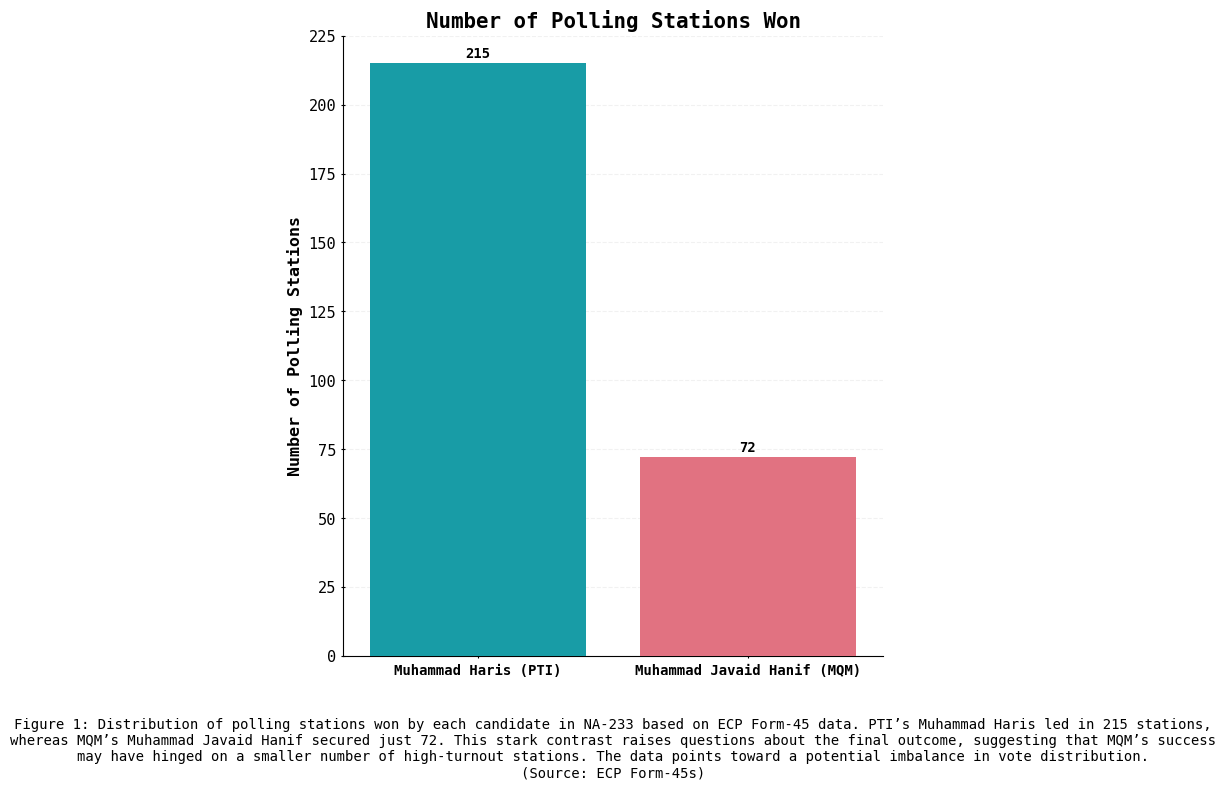

In [8]:
font_family = 'monospace'
sns.set_style({
    'axes.facecolor': 'none',
    'grid.color': 'lightgrey',
    'axes.edgecolor': 'black',
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.bottom': True,
    'ytick.left': True,
    'font.family': font_family,
    'font.size': 12
})

data_233_ECP_Winner = data_233['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_233_ECP_Winner))]

plt.figure(figsize=(10, 8))
ax = plt.gca()

bars = sns.barplot(
    x=data_233_ECP_Winner.index,
    y=data_233_ECP_Winner.values,
    hue=data_233_ECP_Winner.index,
    legend=False,
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_233_ECP_Winner.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold', ha='center')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.text(
    0.5, -0.15,
    'Figure 1: Distribution of polling stations won by each candidate in NA-233 based on ECP Form-45 data. PTI’s Muhammad Haris led in 215 stations,\n'
    'whereas MQM’s Muhammad Javaid Hanif secured just 72. This stark contrast raises questions about the final outcome, suggesting that MQM’s success\n'
    'may have hinged on a smaller number of high-turnout stations. The data points toward a potential imbalance in vote distribution.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    wrap=False,
    transform=plt.gca().transAxes
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_1.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 2**
Number of Votes received by each candidate in General Elections 2024 in NA-233 (Based on ECP Form-45s)


/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_25812/798017267.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


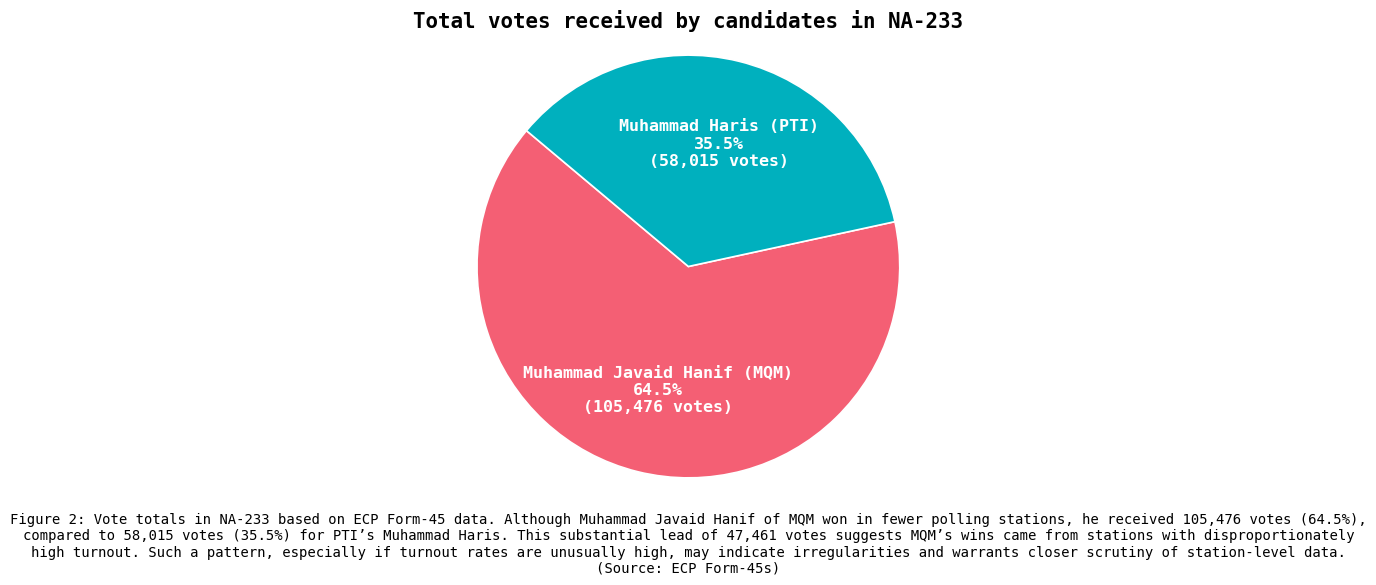

In [9]:
data_233_votes_ecp = data_233[['OPP_VOTES_ECP', 'PTI_VOTES_ECP']].sum()
data_233_votes_ecp.index = ['Muhammad Javaid Hanif (MQM)', 'Muhammad Haris (PTI)']
candidate_colors = {
    'Muhammad Javaid Hanif (MQM)': pink,
    'Muhammad Haris (PTI)': blue
}
colors = [candidate_colors[name] for name in data_233_votes_ecp.index]
labels = data_233_votes_ecp.index
values = data_233_votes_ecp.values
def make_autopct(labels, values):
    def my_autopct(pct):
        val = int(round(pct * sum(values) / 100.0))
        label = labels[my_autopct.i]
        my_autopct.i += 1
        return f'{label}\n{pct:.1f}%\n({val:,} votes)'
    my_autopct.i = 0
    return my_autopct
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct=make_autopct(labels, values),
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)
plt.title('Total votes received by candidates in NA-233', fontsize=15, fontweight='bold', color='black')
plt.axis('equal') 
plt.text(
    0.5, -0.1,
    'Figure 2: Vote totals in NA-233 based on ECP Form-45 data. Although Muhammad Javaid Hanif of MQM won in fewer polling stations, he received 105,476 votes (64.5%),\n'
    'compared to 58,015 votes (35.5%) for PTI’s Muhammad Haris. This substantial lead of 47,461 votes suggests MQM’s wins came from stations with disproportionately\n'
    'high turnout. Such a pattern, especially if turnout rates are unusually high, may indicate irregularities and warrants closer scrutiny of station-level data.\n(Source: ECP Form-45s)',
    wrap=False,
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_2.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 3**
Distribution of Turnout percentages in General Elections 2024 in NA-233 (Based on ECP Form-45s) NA

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_25812/123952520.py:19: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_25812/123952520.py:19: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.05`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(


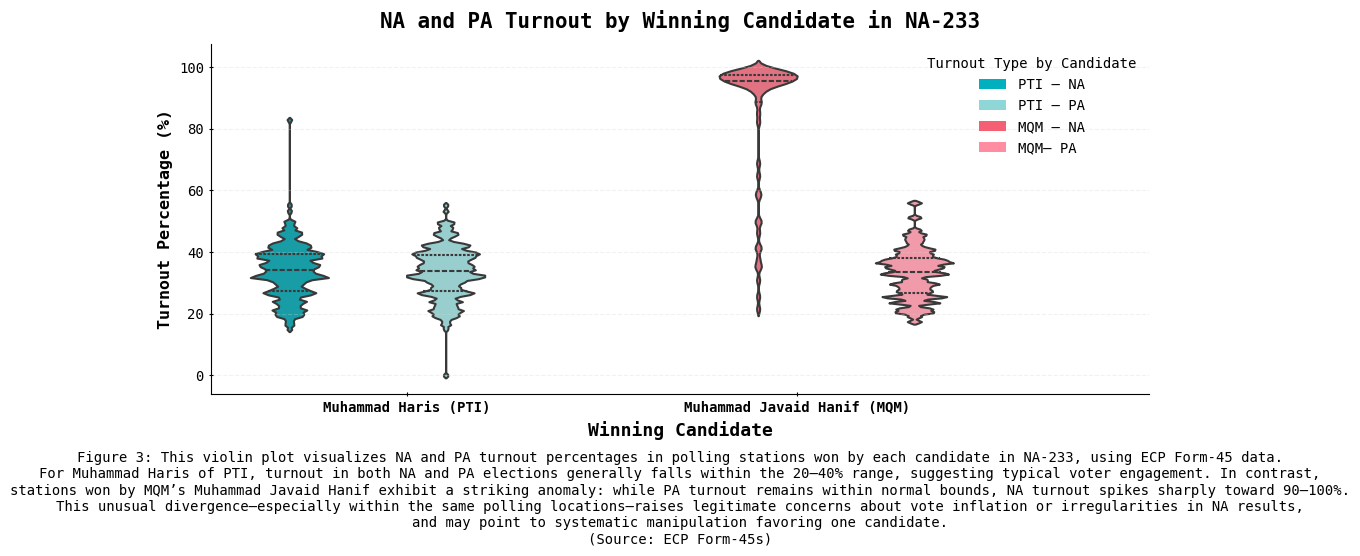

In [10]:
df_long = data_233[['WINNER_ECP', 'TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP']].copy()
df_long = df_long.melt(
    id_vars='WINNER_ECP',
    value_vars=['TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP'],
    var_name='Turnout Type',
    value_name='Turnout Percentage'
    )
df_long['Turnout Type'] = df_long['Turnout Type'].str.replace('TURNOUT_', '').str.replace('_PERCENTAGE_ECP', '')
df_long['Turnout Percentage'] = df_long['Turnout Percentage'].astype(float)

palette = {
    ('Muhammad Haris (PTI)', 'NA'): blue,
    ('Muhammad Haris (PTI)', 'PA'): light_blue,
    ('Muhammad Javaid Hanif (MQM)', 'NA'): pink,
    ('Muhammad Javaid Hanif (MQM)', 'PA'): light_pink
}
df_long['Hue Group'] = list(zip(df_long['WINNER_ECP'], df_long['Turnout Type']))
plt.figure(figsize=(13, 6))
ax = sns.violinplot(
    x='WINNER_ECP',
    y='Turnout Percentage',
    hue='Hue Group',
    data=df_long,
    palette=palette,
    inner='quartile',
    linewidth=1.5,
    scale='width',
    bw=0.05,
    dodge=True
)

plt.xlabel('Winning Candidate', fontsize=13, fontweight='bold')
plt.ylabel('Turnout Percentage (%)', fontsize=12, fontweight='bold')
plt.title('NA and PA Turnout by Winning Candidate in NA-233', fontsize=15, fontweight='bold', pad=12)
plt.xticks(fontsize=10, fontweight='semibold')
plt.yticks(fontsize=10)
plt.xlim(-0.5, 1.9)
ax.grid(axis='y', linestyle='--', alpha=0.3)

legend_elements = [
    Patch(facecolor=blue, label='PTI – NA'),
    Patch(facecolor=light_blue, label='PTI – PA'),
    Patch(facecolor=pink, label='MQM – NA'),
    Patch(facecolor=light_pink, label='MQM– PA')
]
ax.legend(handles=legend_elements, title='Turnout Type by Candidate', loc='upper right', frameon=False)

plt.text(
    0.5, -0.3,
    'Figure 3: This violin plot visualizes NA and PA turnout percentages in polling stations won by each candidate in NA-233, using ECP Form-45 data.\n'
    'For Muhammad Haris of PTI, turnout in both NA and PA elections generally falls within the 20–40% range, suggesting typical voter engagement. In contrast,\n'
    'stations won by MQM’s Muhammad Javaid Hanif exhibit a striking anomaly: while PA turnout remains within normal bounds, NA turnout spikes sharply toward 90–100%.\n'
    'This unusual divergence—especially within the same polling locations—raises legitimate concerns about vote inflation or irregularities in NA results,\n'
    'and may point to systematic manipulation favoring one candidate.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    wrap=False,
    transform=ax.transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_3.png', dpi=600, bbox_inches='tight')
plt.show()


## **Graph 4**
Number of polling stations won by each candidate in General Elections 2024 in NA-233 (Based on ECP Form-45s) where turnout difference between NA and PA was more than 50 votes

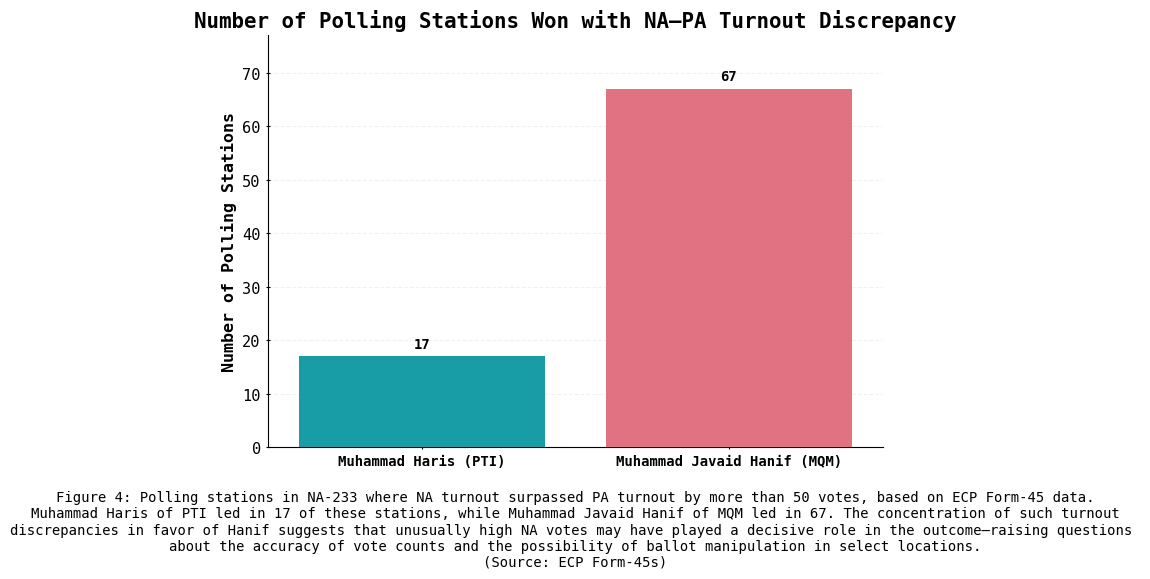

In [11]:
data_233_Discrepency = data_233[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy()
data_233_Discrepency = data_233_Discrepency[abs(data_233_Discrepency['TURNOUT_DIFFERENCE']) >= 50]

data_233_ECP_Winner_discrepency = data_233_Discrepency['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_233_ECP_Winner_discrepency))]

plt.figure(figsize=(10, 6))
ax = plt.gca()

bars = sns.barplot(
    x=data_233_ECP_Winner_discrepency.index,
    y=data_233_ECP_Winner_discrepency.values,
    hue=data_233_ECP_Winner_discrepency.index,
    
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won with NA–PA Turnout Discrepancy', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_233_ECP_Winner_discrepency.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.text(
    0.5, -0.2,
    'Figure 4: Polling stations in NA-233 where NA turnout surpassed PA turnout by more than 50 votes, based on ECP Form-45 data.\n'
    'Muhammad Haris of PTI led in 17 of these stations, while Muhammad Javaid Hanif of MQM led in 67. The concentration of such turnout\n'
    'discrepancies in favor of Hanif suggests that unusually high NA votes may have played a decisive role in the outcome—raising questions \n'
    'about the accuracy of vote counts and the possibility of ballot manipulation in select locations.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    wrap=False
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_4.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 5**
This shows the distribution of absolute turnout differences between NA and PA polling stations in General Elections 2024 in NA-233 (Based on ECP Form-45s)

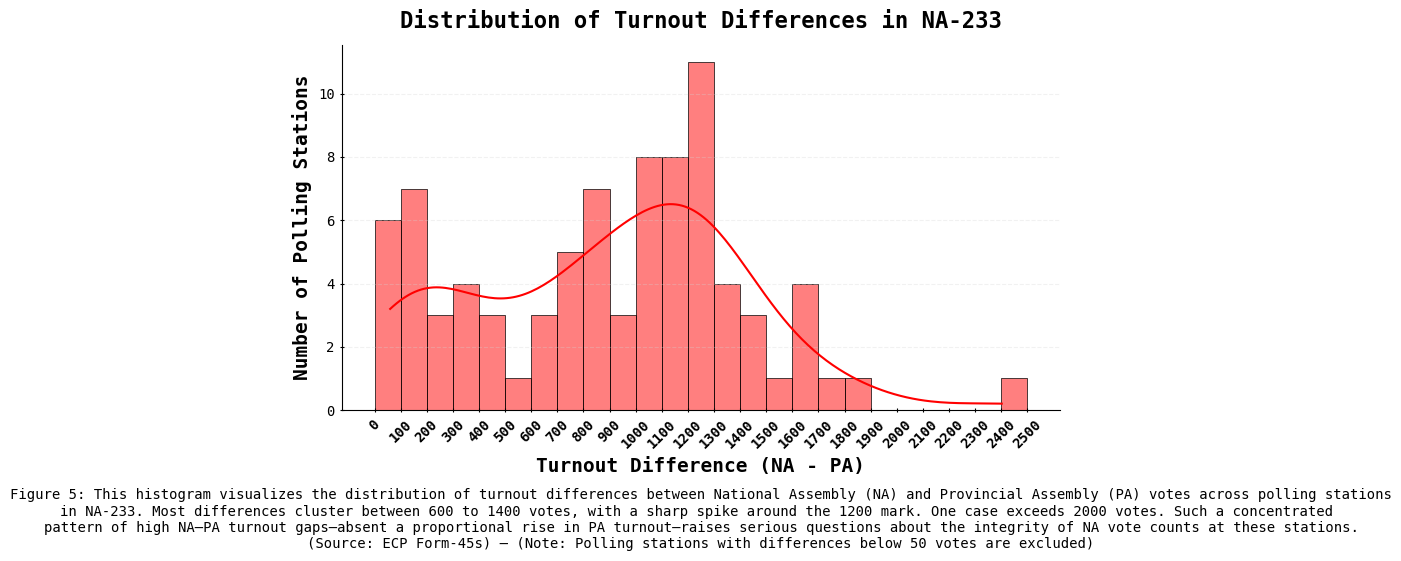

In [12]:
data_233_discrepency = data_233[['TURNOUT_DIFFERENCE']].copy()
data_233_discrepency = data_233_discrepency[abs(data_233_discrepency['TURNOUT_DIFFERENCE']) >= 50]

min_diff = (data_233_discrepency['TURNOUT_DIFFERENCE'].min() // 100) * 100
max_diff = (data_233_discrepency['TURNOUT_DIFFERENCE'].max() // 100 + 1) * 100
bin_edges = np.arange(min_diff, max_diff + 100, 100)

plt.figure(figsize=(12, 6))
sns.histplot(
    data=data_233_discrepency,
    x='TURNOUT_DIFFERENCE',
    bins=bin_edges,
    kde=True,
    color='red',
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel('Turnout Difference (NA - PA)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=14, fontweight='bold')
plt.title('Distribution of Turnout Differences in NA-233', fontsize=16, fontweight='bold', pad=12)
plt.xticks(bin_edges, fontsize=10, fontweight='semibold', rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.text(
    0.5, -0.3,
    'Figure 5: This histogram visualizes the distribution of turnout differences between National Assembly (NA) and Provincial Assembly (PA) votes across polling stations\n'
    'in NA-233. Most differences cluster between 600 to 1400 votes, with a sharp spike around the 1200 mark. One case exceeds 2000 votes. Such a concentrated \n'
    'pattern of high NA–PA turnout gaps—absent a proportional rise in PA turnout—raises serious questions about the integrity of NA vote counts at these stations.\n'
    '(Source: ECP Form-45s) — (Note: Polling stations with differences below 50 votes are excluded)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    wrap=False
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_5.png', dpi=600, bbox_inches='tight')
plt.show()